<a href="https://colab.research.google.com/github/helgadenes/Bootcamp2025/blob/main/CursoA_Semana1/Clase_06/Multi_wavelength_data_for_galaxies_v2_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Multi-wavelength data tutorial for galaxies

This notebook shows:
- how to acess multi-wavelength imaging data using the skyview data base.
- how to make high quality plots
- how to make 3 colour plots of astronomical data
- how to make overlays of images


In [1]:
# this installs the relevant packages

! pip install reproject
! pip install astroquery

In [2]:
# loading packages

import numpy as np
import matplotlib.pyplot as plt

# standard astronomy packages
from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from reproject import reproject_interp

# accessing data from SkyView
from astroquery.skyview import SkyView
from astroquery.vizier import Vizier

# for 3 colour images
from astropy.visualization import make_lupton_rgb
from astropy.utils.data import get_pkg_data_filename

## Retrieve image from an online archive
We are going to use skyview

You can check the name of the available survey data here: https://astroquery.readthedocs.io/en/latest/skyview/skyview.html  (this is a list of names that can go into the survey argument)

You can also use the skyview website directly to check if the particular survey has data for that galaxy: https://skyview.gsfc.nasa.gov/current/cgi/query.pl just type in the name or the coordinates of the galaxy and select the surveys you are interested in.

Generaly the DSS2 Survey (2nd Digitised Sky Survey) is a good start since it covers the whole sky. 'Blue' referes to the band in which the data was taken. Blue is taken with a filter that lets trough the blue optical light from the galaxy.

In [3]:
# this is to access files from Google Drive
from google.colab import drive
drive.mount('/content/drive')

# location of the data files
directory = '/content/drive/My Drive/Colab Notebooks/'

# this line grabs the image from the remote server
# The example galaxies are from the Virgo cluster

name = 'NGC 4321' # spiral galaxy

file = directory+'/ngc4321_sdss_g.fits'
hdulist_sdss_g = fits.open(file)

# Fits files have a header part, which contains the metadata of the file, in this case the details of the observation
h_sdss_g = hdulist_sdss_g[0].header

# and a data part, which is esentially an N dimensional matrix with numbers
d_sdss_g = hdulist_sdss_g[0].data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Visualise the data


(300, 300)


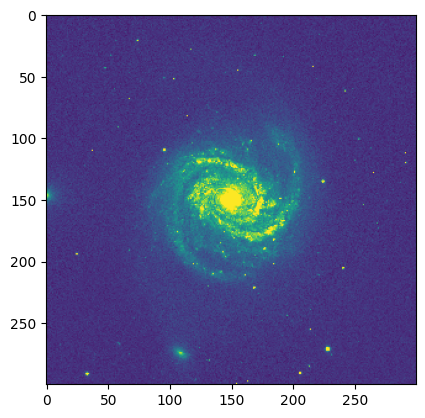

In [4]:
# check the dimensions of the data
print(d_sdss_g.shape)

# quick look
plt.imshow(d_sdss_g, vmax=np.percentile(d_sdss_g, 99.5))

### Let's have a look at the metadata


In [5]:
# print the full header
h_sdss_g[:20]

SIMPLE  =                    T / Written by SkyView Tue Jul 08 00:53:02 EDT 2025
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  300 / Width of image                                 
NAXIS2  =                  300 / Height of image                                
CRVAL1  =   185.72887499999993 / Reference longitude                            
CRVAL2  =            15.822305 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                150.5 / X reference pixel                              
CRPIX2  =                150

## Let's make high quality images


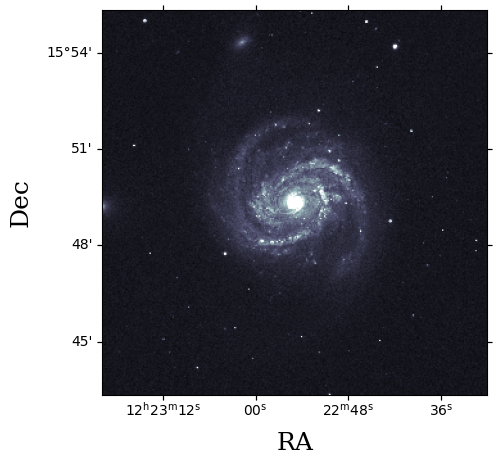

In [6]:
# lets make a nice figure

fig = plt.figure(figsize=(6,5))

# to correctly label the axes we are using the WCS package from astropy
# WCS stands for World Coordinate System
ax = fig.add_subplot(1,1,1, projection=WCS(h_sdss_g))
ax.imshow(d_sdss_g, cmap='bone', vmax=np.percentile(d_sdss_g, 99.8))
ax.set_xlabel('RA', size=18,family='serif')
ax.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

fig.savefig('{}_DDS2.png'.format(name), dpi=200)

# Note that the HI disk is very similar in size to the stellar disk

## Let's make 3 colour images

For this we will more modern data from SDSS survey (https://classic.sdss.org/home.php)

Note that this survey uses different filters (different wavelengths) comapred to the DSS survey.

In [7]:
file = directory+'/ngc4321_sdss_r.fits'
hdulist_sdss_r = fits.open(file)

d_sdss_r = hdulist_sdss_r[0].data
h_sdss_r = hdulist_sdss_r[0].header

file = directory+'/ngc4321_sdss_i.fits'
hdulist_sdss_i = fits.open(file)

d_sdss_i = hdulist_sdss_i[0].data
h_sdss_i = hdulist_sdss_i[0].header

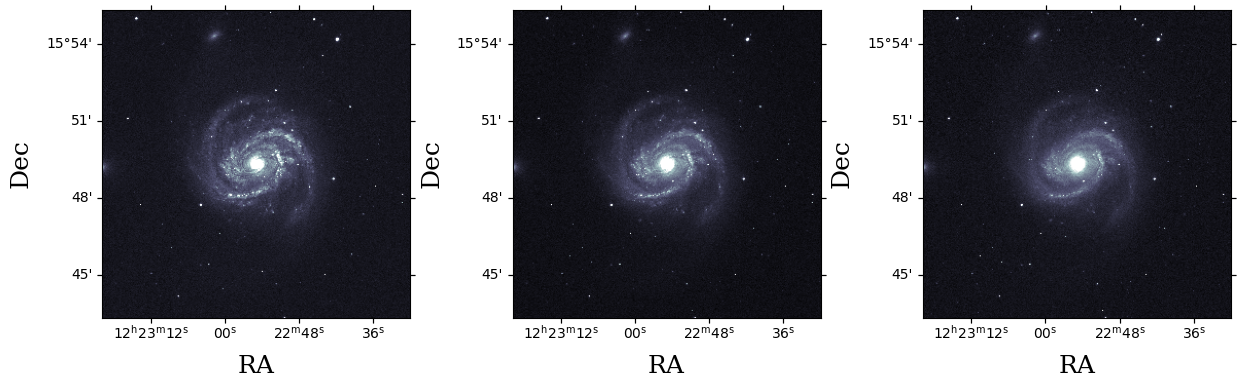

In [8]:
# quick plot to check the images

fig = plt.figure(figsize=(15,4))

ax = fig.add_subplot(1,3,1, projection=WCS(h_sdss_g))
ax.imshow(d_sdss_g, cmap='bone', vmax=np.percentile(d_sdss_g, 99.8))
ax.set_xlabel('RA', size=18,family='serif')
ax.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

ax = fig.add_subplot(1,3,2, projection=WCS(h_sdss_r))
ax.imshow(d_sdss_r, cmap='bone', vmax=np.percentile(d_sdss_r, 99.8))
ax.set_xlabel('RA', size=18,family='serif')
ax.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

ax = fig.add_subplot(1,3,3, projection=WCS(h_sdss_i))
ax.imshow(d_sdss_i, cmap='bone', vmax=np.percentile(d_sdss_i, 99.8))
ax.set_xlabel('RA', size=18,family='serif')
ax.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

fig.savefig('{}_DDS2.png'.format(name), dpi=200)

/usr/local/lib/python3.11/dist-packages/astropy/visualization/lupton_rgb.py:645: RuntimeWarning: invalid value encountered in divide
  fInorm = np.where(Int <= 0, 0, np.true_divide(fI, Int))


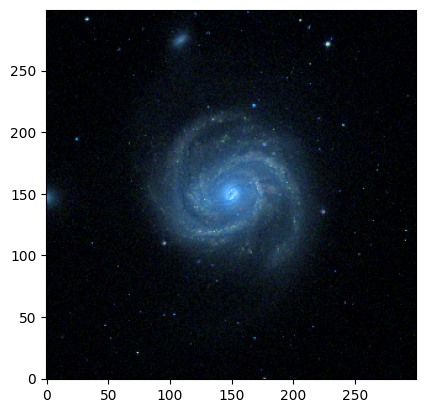

In [9]:
# assigning colours to the image layers
g = d_sdss_g
r = d_sdss_r
i = d_sdss_i

# making a quick image
# A lower Q and stretch parameter make the fainter features in the image visible
rgb_default = make_lupton_rgb(g, r, i, Q=5, stretch=0.8, filename="test.jpeg")

# checking the data
plt.imshow(rgb_default, origin='lower')

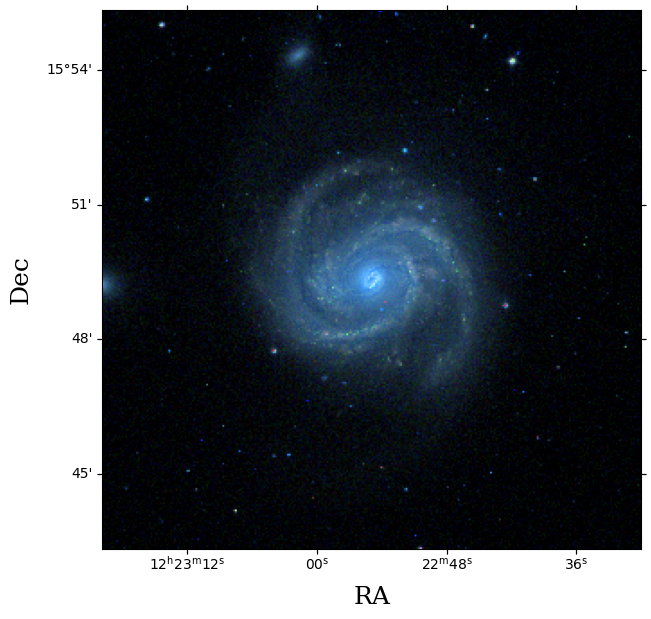

In [10]:
# making a plot
fig = plt.figure(figsize=(8,7))

ax = fig.add_subplot(1,1,1, projection=WCS(h_sdss_g))
plt.imshow(rgb_default, origin='lower')
ax.set_xlabel('RA', size=18,family='serif')
ax.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

fig.savefig('{}_SDSS.png'.format(name), dpi=200)


## Compare data from different wavelengths

GALEX NUV, SDSS r, 2MASS J, WISE 3.4, and NVSS data

What is the difference? What to do we see in the different wavelengths?

In [11]:
# get the data

# UV data so the young high mass stars, which indicate recent star formation
file = directory+'/ngc4321_galex_nuv.fits'
hdulist_GALEX_NUV = fits.open(file)

d_GALEX_NUV = hdulist_GALEX_NUV[0].data
h_GALEX_NUV = hdulist_GALEX_NUV[0].header

# near infrared, this light comes from old stars
file = directory+'/ngc4321_2mass_J.fits'
hdulist_2MASS_J = fits.open(file)

d_2MASS_J = hdulist_2MASS_J[0].data
h_2MASS_J = hdulist_2MASS_J[0].header

# infrared, mostly thermal radiation from dust
file = directory+'/ngc4321_wise_34.fits'
hdulist_WISE_34 = fits.open(file)

d_WISE_34 = hdulist_WISE_34[0].data
h_WISE_34 = hdulist_WISE_34[0].header

# radio, this is a type of syncrotron radiation (high energy charged particles moving along a magnetic field),
# this radiation gets produced in HII regions, and also indicates star formation
file = directory+'/ngc4321_nvss.fits'
hdulist_NVSS = fits.open(file)

d_NVSS = hdulist_NVSS[0].data
h_NVSS = hdulist_NVSS[0].header

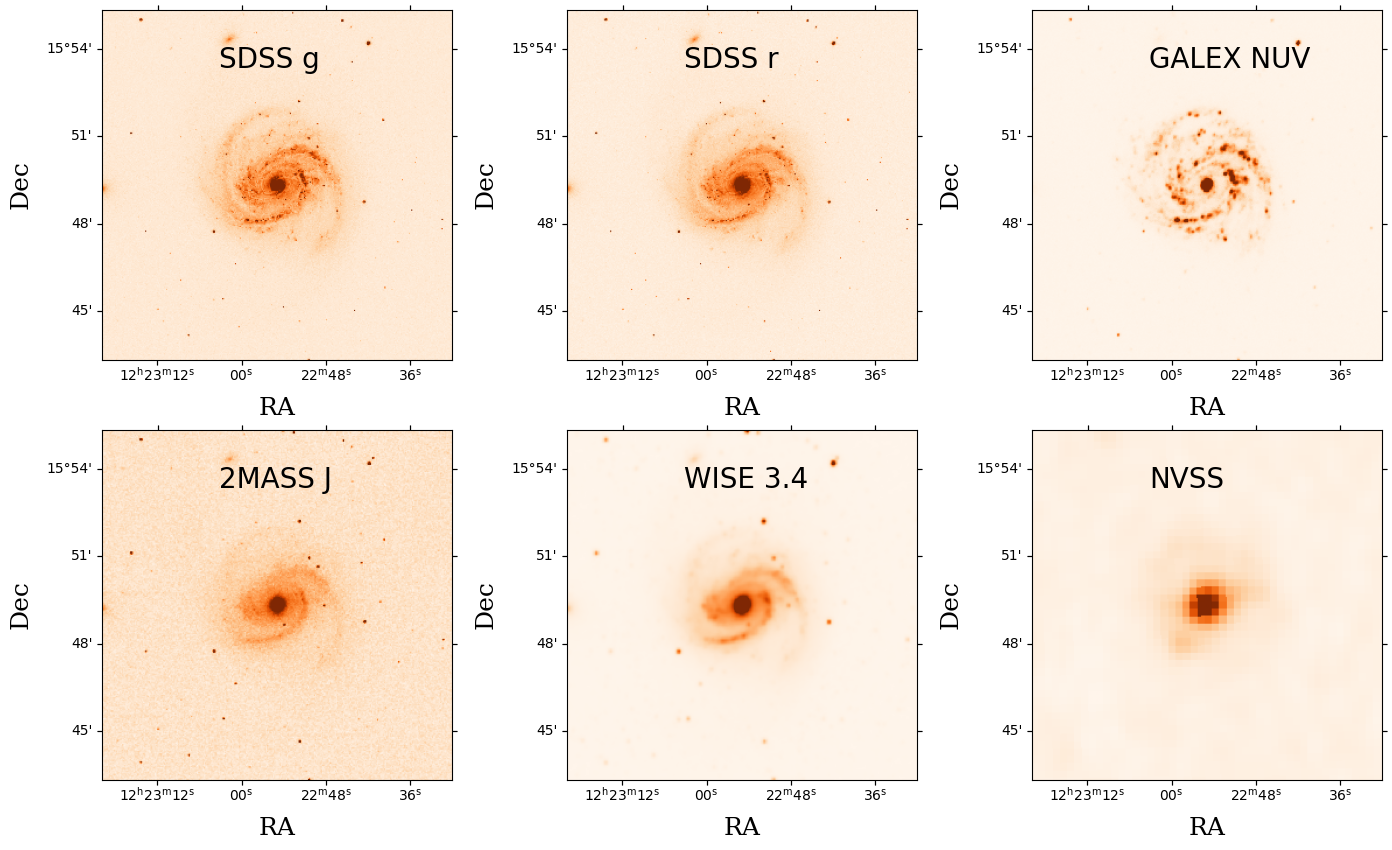

In [12]:
# comapre images

fig = plt.figure(figsize=(17,10))

ax1 = fig.add_subplot(2,3,1, projection=WCS(h_sdss_g))
ax1.text(100, 250 ,'SDSS g', fontsize=20)
ax1.imshow(d_sdss_g, cmap='Oranges', vmax=np.percentile(d_sdss_g, 99.8))
ax1.set_xlabel('RA', size=18,family='serif')
ax1.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

ax2 = fig.add_subplot(2,3,2, projection=WCS(h_sdss_r))
ax2.text(100, 250 ,'SDSS r', fontsize=20)
ax2.imshow(d_sdss_r, cmap='Oranges', vmax=np.percentile(d_sdss_r, 99.8))
ax2.set_xlabel('RA', size=18,family='serif')
ax2.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

ax3 = fig.add_subplot(2,3,3, projection=WCS(h_GALEX_NUV))
ax3.text(100, 250 ,'GALEX NUV', fontsize=20)
ax3.imshow(d_GALEX_NUV, cmap='Oranges', vmax=np.percentile(d_GALEX_NUV, 99.8))
ax3.set_xlabel('RA', size=18,family='serif')
ax3.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

ax4 = fig.add_subplot(2,3,4, projection=WCS(h_sdss_r))
ax4.text(100, 250 ,'2MASS J', fontsize=20)
ax4.imshow(d_2MASS_J, cmap='Oranges', vmax=np.percentile(d_2MASS_J, 99.8))
ax4.set_xlabel('RA', size=18,family='serif')
ax4.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

ax5 = fig.add_subplot(2,3,5, projection=WCS(h_sdss_r))
ax5.text(100, 250 ,'WISE 3.4', fontsize=20)
ax5.imshow(d_WISE_34, cmap='Oranges', vmax=np.percentile(d_WISE_34, 99.8))
ax5.set_xlabel('RA', size=18,family='serif')
ax5.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

ax6 = fig.add_subplot(2,3,6, projection=WCS(h_sdss_r))
ax6.text(100, 250 ,'NVSS', fontsize=20)
ax6.imshow(d_NVSS, cmap='Oranges', vmax=np.percentile(d_NVSS, 99.8))
ax6.set_xlabel('RA', size=18,family='serif')
ax6.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

fig.savefig('{}_compare.png'.format(name), dpi=200)

## Making an overlay

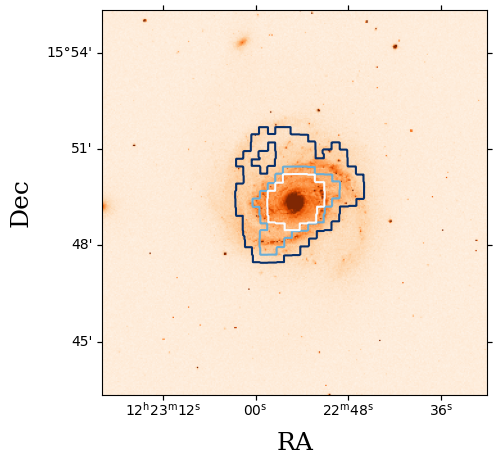

In [13]:
# reproject the data onto the same pixel grid
# we are reprojecting the radio data onto the grid of the optical data, since the resolution of the optical data is generally better
NVSS_reprojected, footprint = reproject_interp(hdulist_NVSS, h_sdss_r)

# calculating the rms of the radio data - this can be used for the contours
rms_NVSS = np.sqrt(np.mean(NVSS_reprojected**2))

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1,1,1, projection=WCS(h_sdss_r))
ax.imshow(d_sdss_r, cmap='Oranges', vmax=np.percentile(d_sdss_r, 99.8))
ax.contour(NVSS_reprojected, levels=rms_NVSS*np.array([1,2,3]), cmap='Blues_r')
ax.set_xlabel('RA', size=18,family='serif')
ax.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

fig.savefig('{}_overlay.png'.format(name), dpi=200)



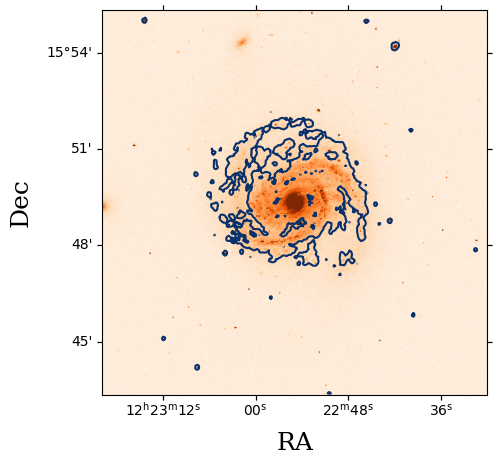

In [14]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1,1,1, projection=WCS(h_sdss_r))
ax.imshow(d_sdss_r, cmap='Oranges', vmax=np.percentile(d_sdss_r, 99.8))
ax.contour(d_GALEX_NUV, levels=rms_NVSS*np.array([5]), cmap='Blues_r')
ax.set_xlabel('RA', size=18,family='serif')
ax.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()